In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/data_analasis/archive (29)/Toyota_Data.csv")

# Display basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11291 non-null  object 
 1   Adj Close  11291 non-null  float64
 2   Close      11291 non-null  float64
 3   High       11291 non-null  float64
 4   Low        11291 non-null  float64
 5   Open       11291 non-null  float64
 6   Volume     11291 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 617.6+ KB
None
         Date  Adj Close     Close      High       Low      Open  Volume
0  1980-03-17   2.296798  3.291227  3.344743  3.291227  0.000000   41109
1  1980-03-18   2.306134  3.304606  3.358122  3.304606  0.000000    9343
2  1980-03-19   2.306134  3.304606  3.304606  3.304606  3.304606       0
3  1980-03-20   2.306134  3.304606  3.358122  3.304606  0.000000   10277
4  1980-03-21   2.362154  3.384880  3.438396  3.384880  0.000000    8409


In [ ]:
print(df.isnull().sum())


Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [ ]:
# Option 1: Drop rows with missing values
df = df.dropna()

# Option 2: Fill missing values (e.g., using forward fill for time-series data)
df = df.fillna(method='ffill')


<ipython-input-5-3b29aae4516d>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')  # Ensure data is sorted by date


In [ ]:
df = df.drop_duplicates()


In [ ]:
# Calculate Daily Return
df['Daily_Return'] = df['Adj Close'].pct_change()

# Moving Averages (e.g., 7-day and 30-day)
df['MA7'] = df['Adj Close'].rolling(window=7).mean()
df['MA30'] = df['Adj Close'].rolling(window=30).mean()

# Volatility (Standard Deviation over 7 days)
df['Volatility'] = df['Adj Close'].rolling(window=7).std()


In [ ]:
from scipy.stats import zscore

# Compute Z-scores
z_scores = df[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].apply(zscore)

# Remove extreme outliers (Z-score > 3)
df = df[(z_scores < 3).all(axis=1)]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']] = scaler.fit_transform(df[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']])


In [ ]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]


In [ ]:
df.to_csv("\content\Toyota_Data_Cleaned.csv", index=False)


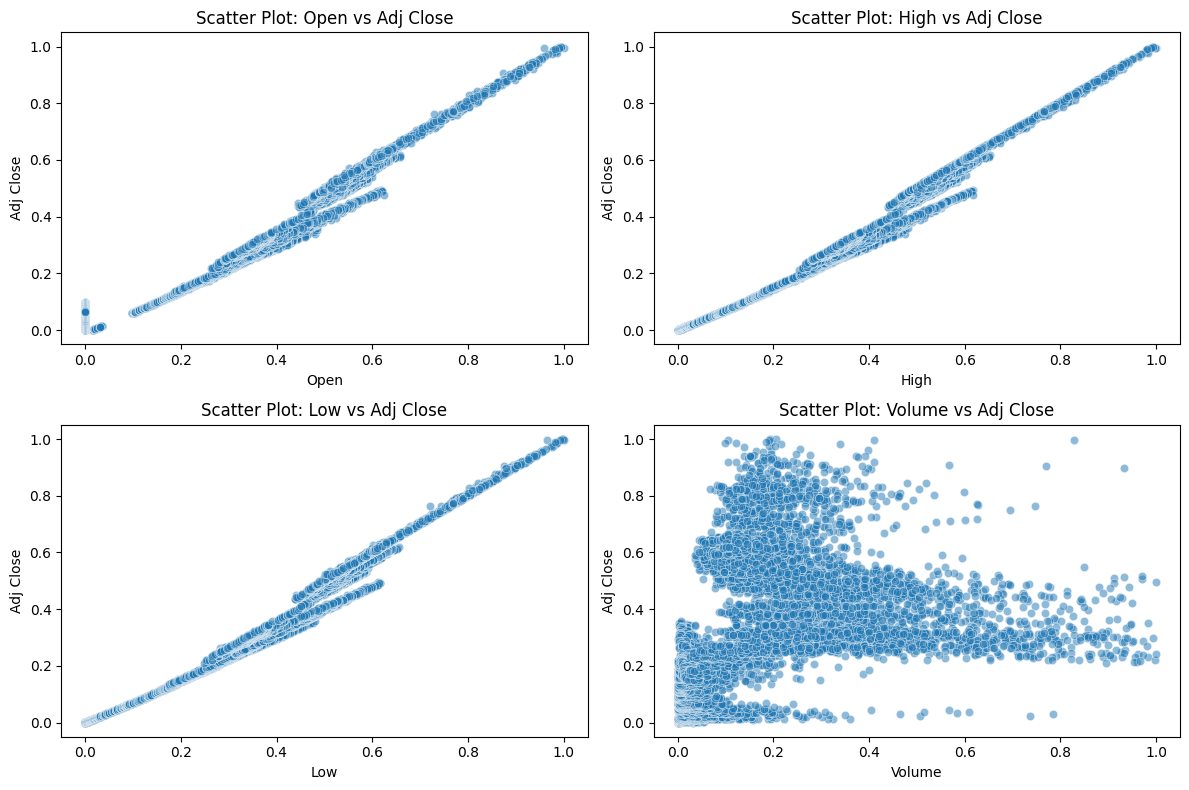

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define independent features and dependent feature
independent_features = ['Open', 'High', 'Low', 'Volume']  # Modify based on your dataset
dependent_feature = 'Adj Close'  # Target variable

# Create scatter plots for each independent feature vs. dependent feature
plt.figure(figsize=(12, 8))

for i, feature in enumerate(independent_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[feature], y=df[dependent_feature], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(dependent_feature)
    plt.title(f'Scatter Plot: {feature} vs {dependent_feature}')

plt.tight_layout()
plt.show()


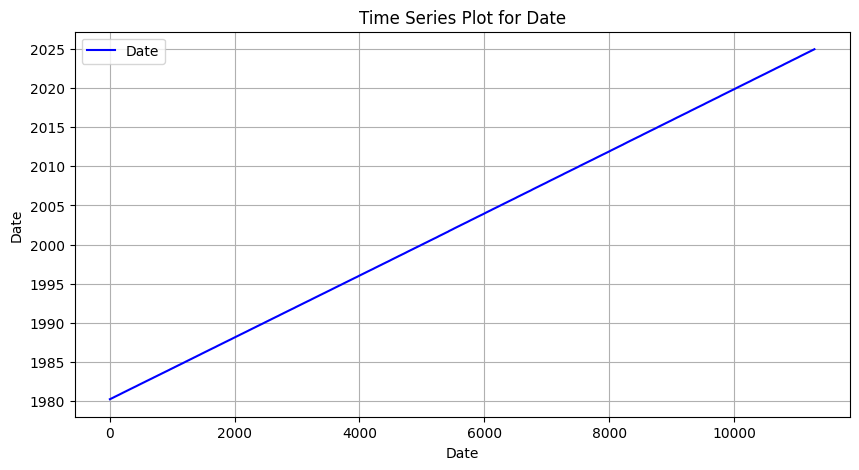

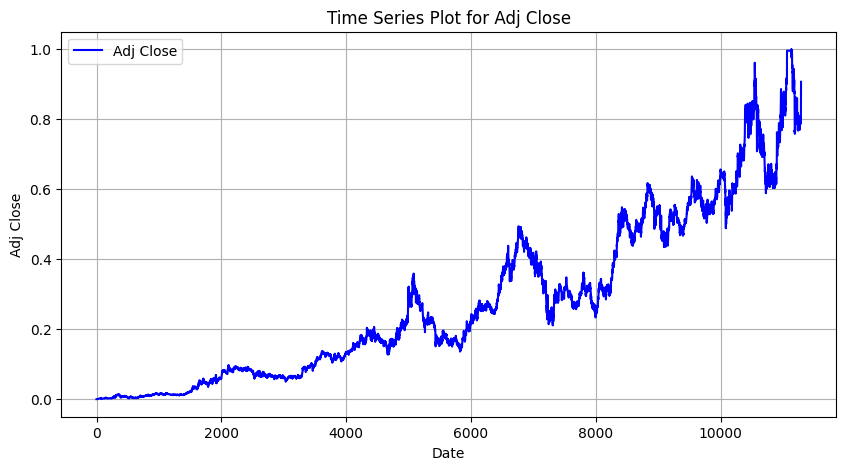

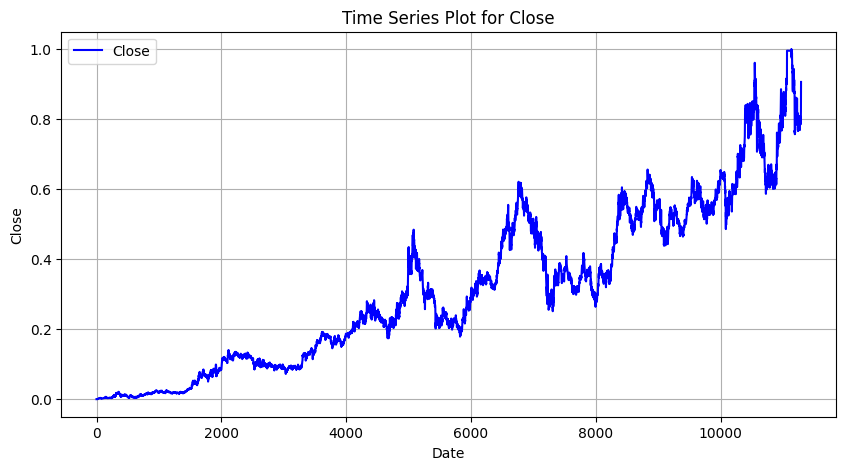

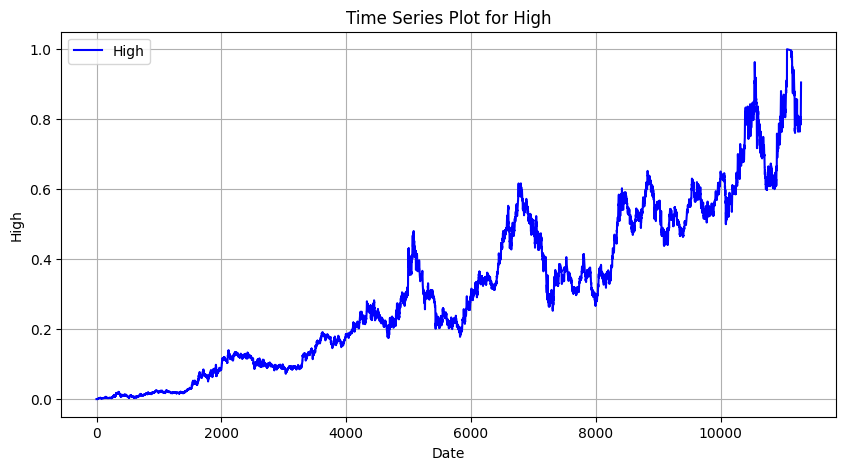

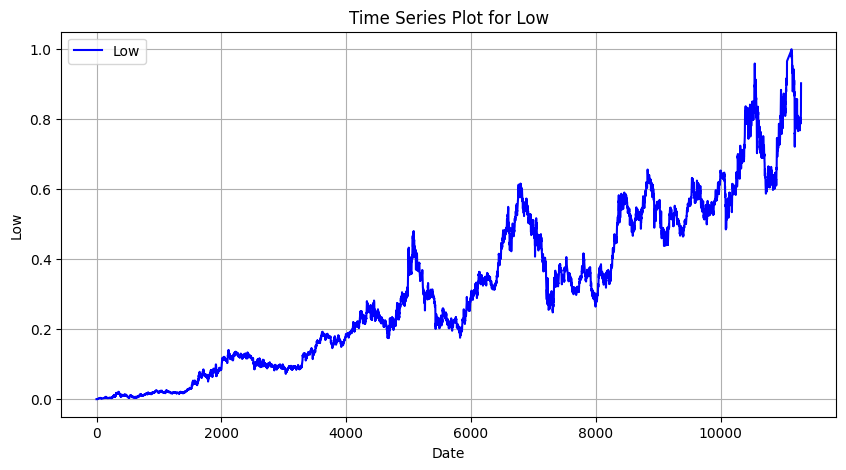

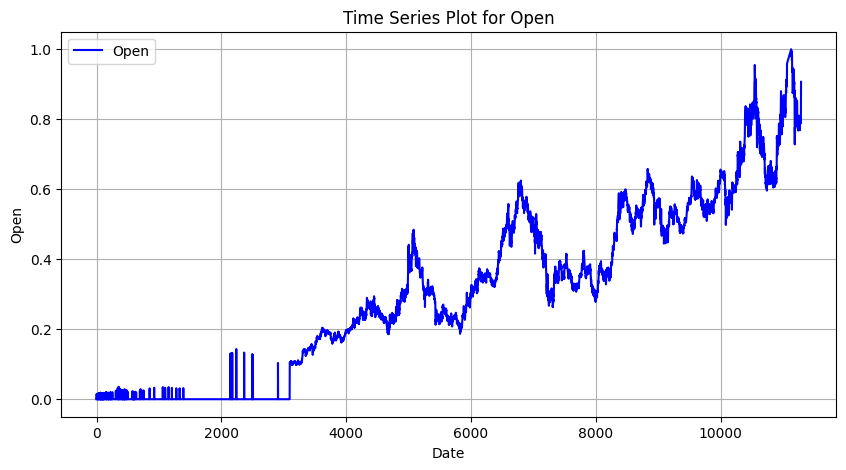

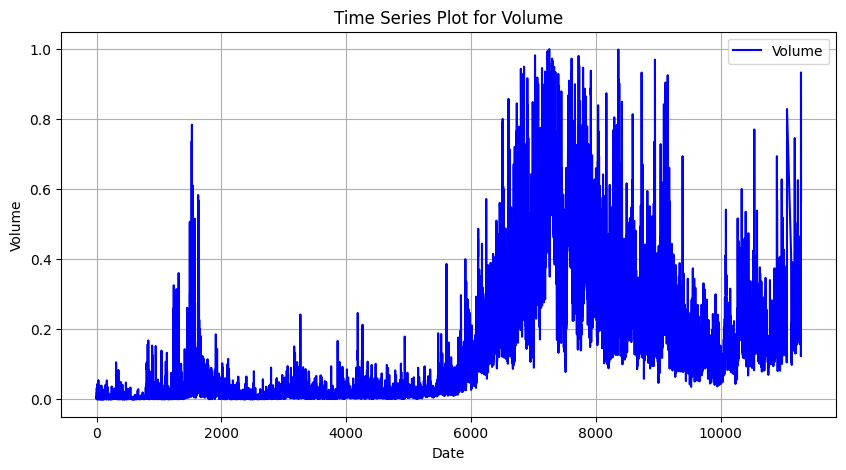

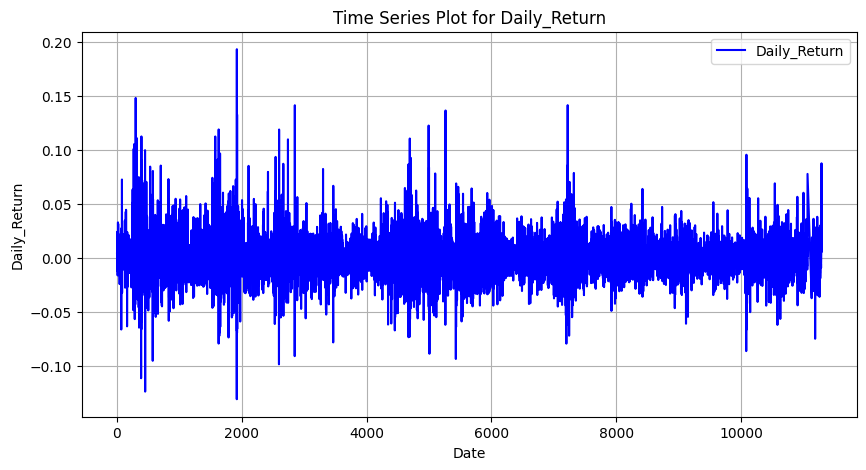

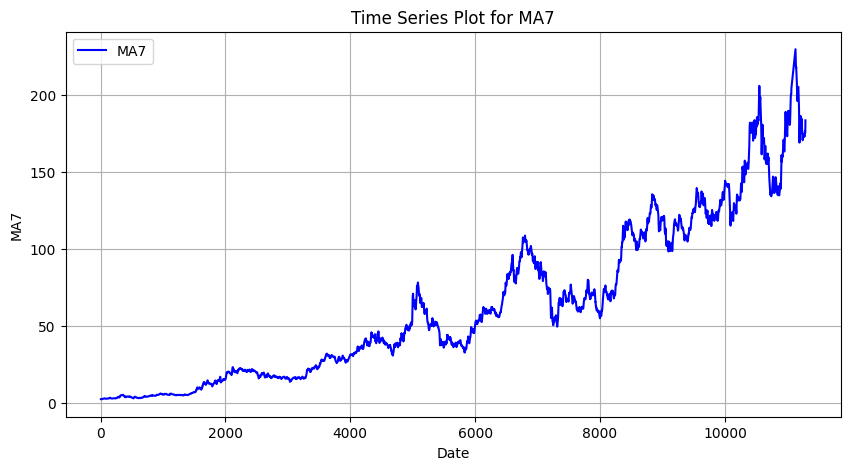

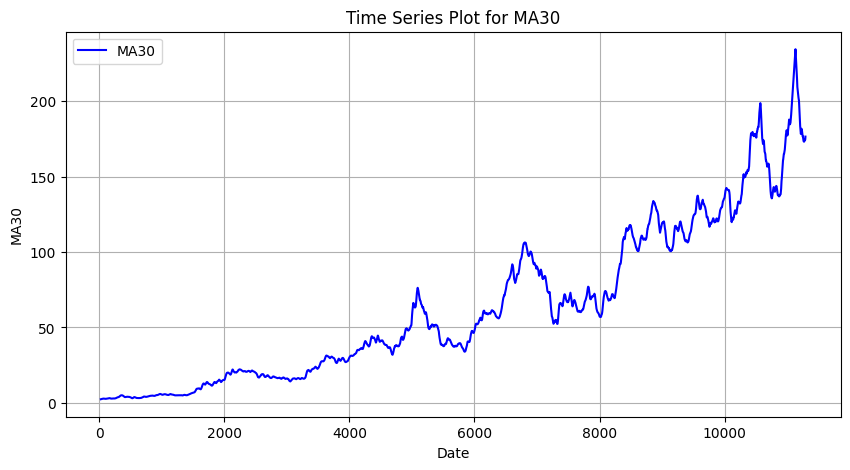

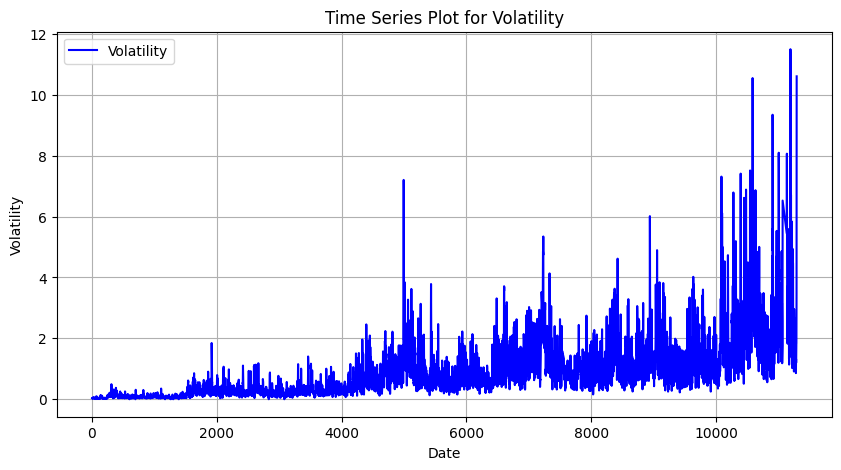

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime if not already
#df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as index
#df.set_index('Date', inplace=True)

# Create individual time series plots for each column
for column in df.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df[column], label=column, color='b')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'Time Series Plot for {column}')
    plt.legend()
    plt.grid(True)
    plt.show()


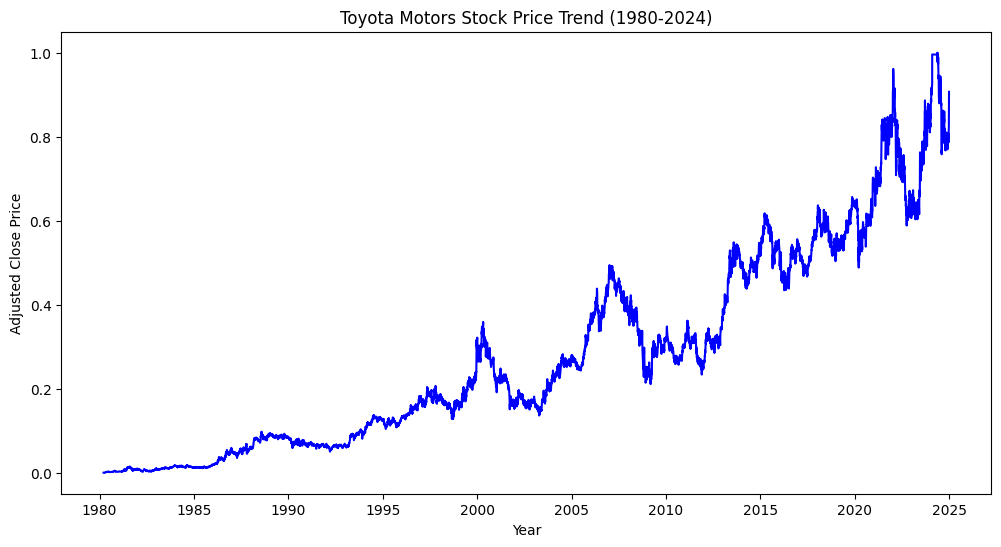

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set Date as Index (optional but useful for time-series plots)
df.set_index('Date', inplace=True)

# Plot the time series
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x=df.index, y='Adj Close', color='blue')

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Adjusted Close Price")
plt.title("Toyota Motors Stock Price Trend (1980-2024)")

# Show plot
plt.show()


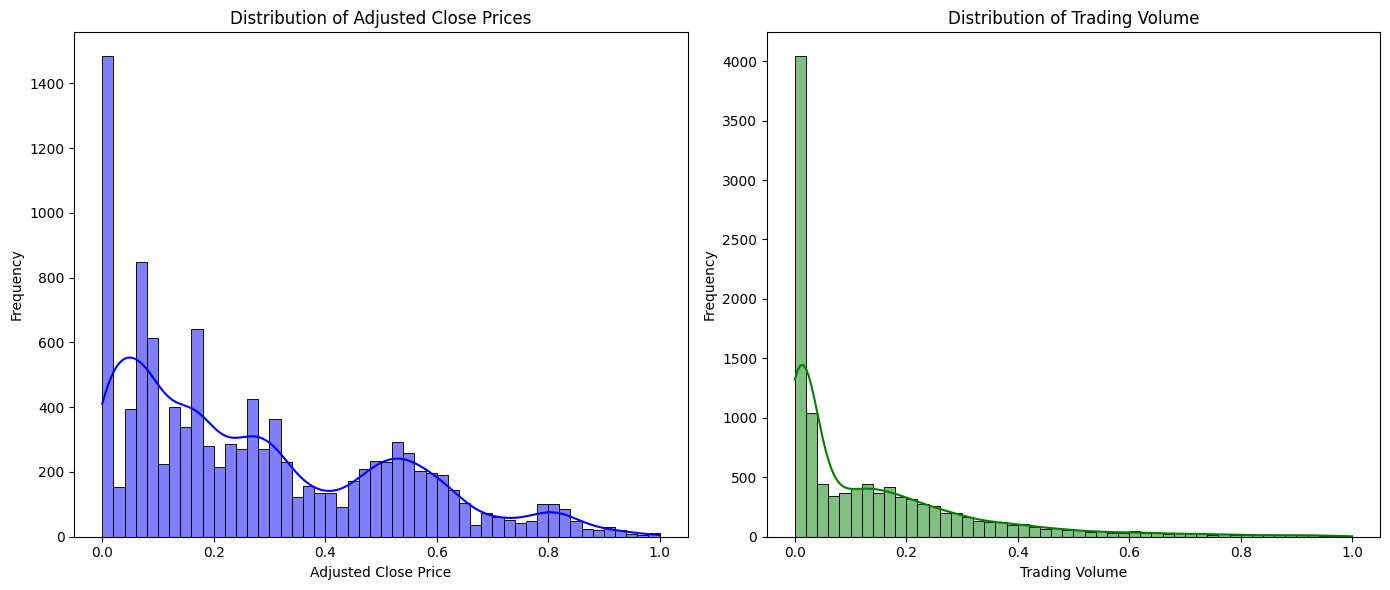

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(14, 6))

# Histogram for Adjusted Close Price
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.histplot(df['Adj Close'], bins=50, kde=True, color='blue')
plt.xlabel("Adjusted Close Price")
plt.ylabel("Frequency")
plt.title("Distribution of Adjusted Close Prices")

# Histogram for Trading Volume
plt.subplot(1, 2, 2)
sns.histplot(df['Volume'], bins=50, kde=True, color='green')
plt.xlabel("Trading Volume")
plt.ylabel("Frequency")
plt.title("Distribution of Trading Volume")

# Show plot
plt.tight_layout()
plt.show()


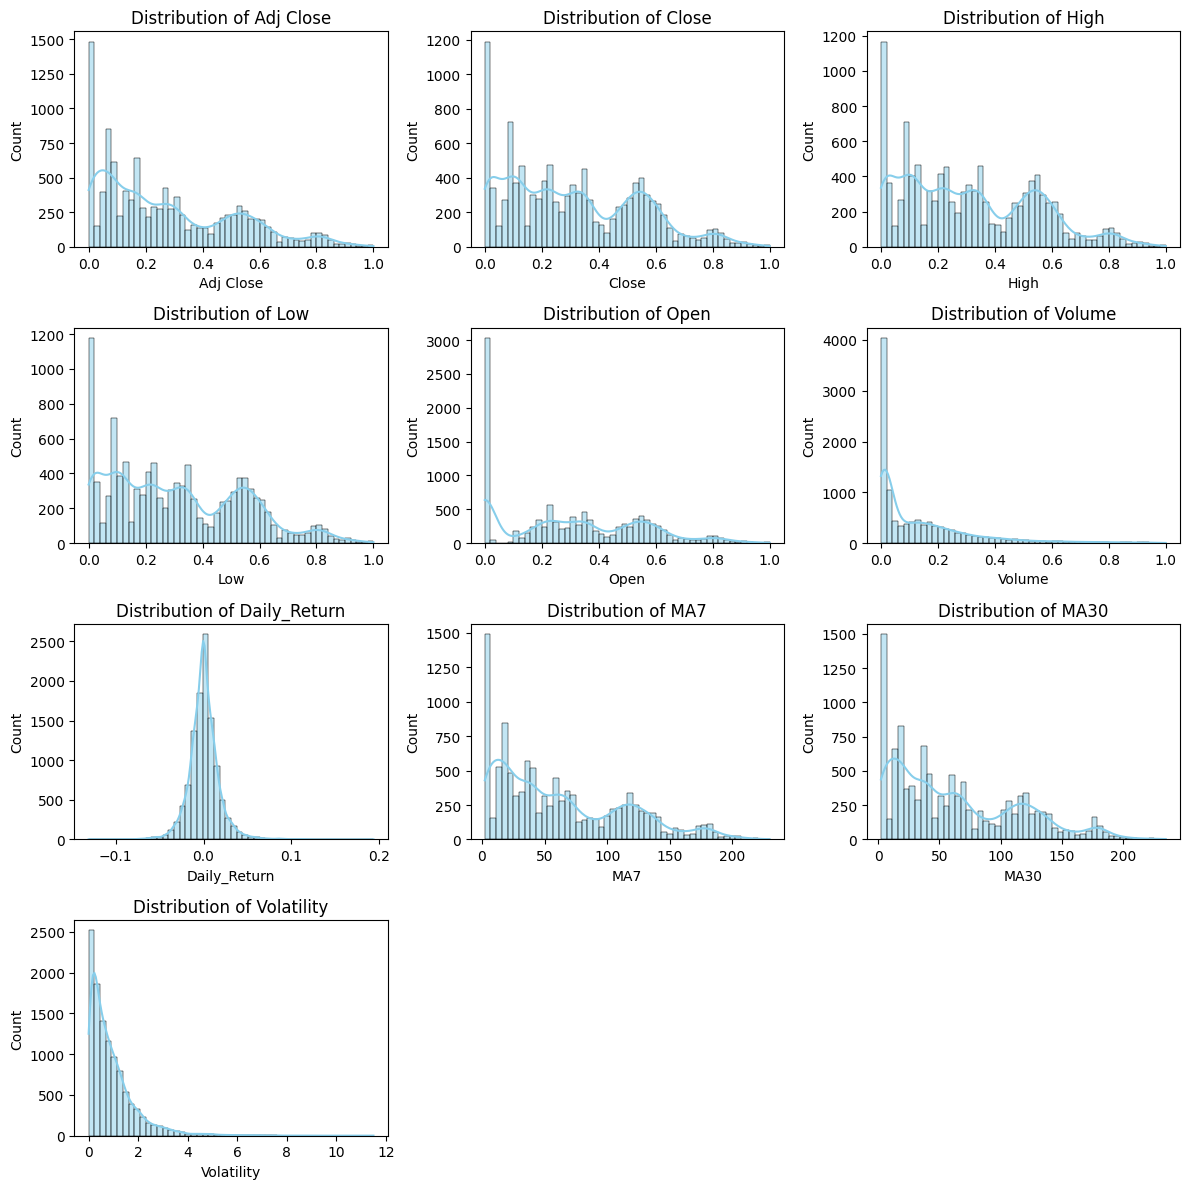

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 12))  # Adjusted figure size for better spacing

# Iterate through all numerical columns and plot histograms
num_cols = len(df.select_dtypes(include=['float64', 'int64']).columns)
# Calculate the number of rows and columns for the subplot grid
num_rows = (num_cols + 2) // 3  # Adjust rows based on the number of columns

for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(num_rows, 3, i)  # Changed to dynamically adjust grid
    sns.histplot(df[column], bins=50, kde=True, color='skyblue')
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

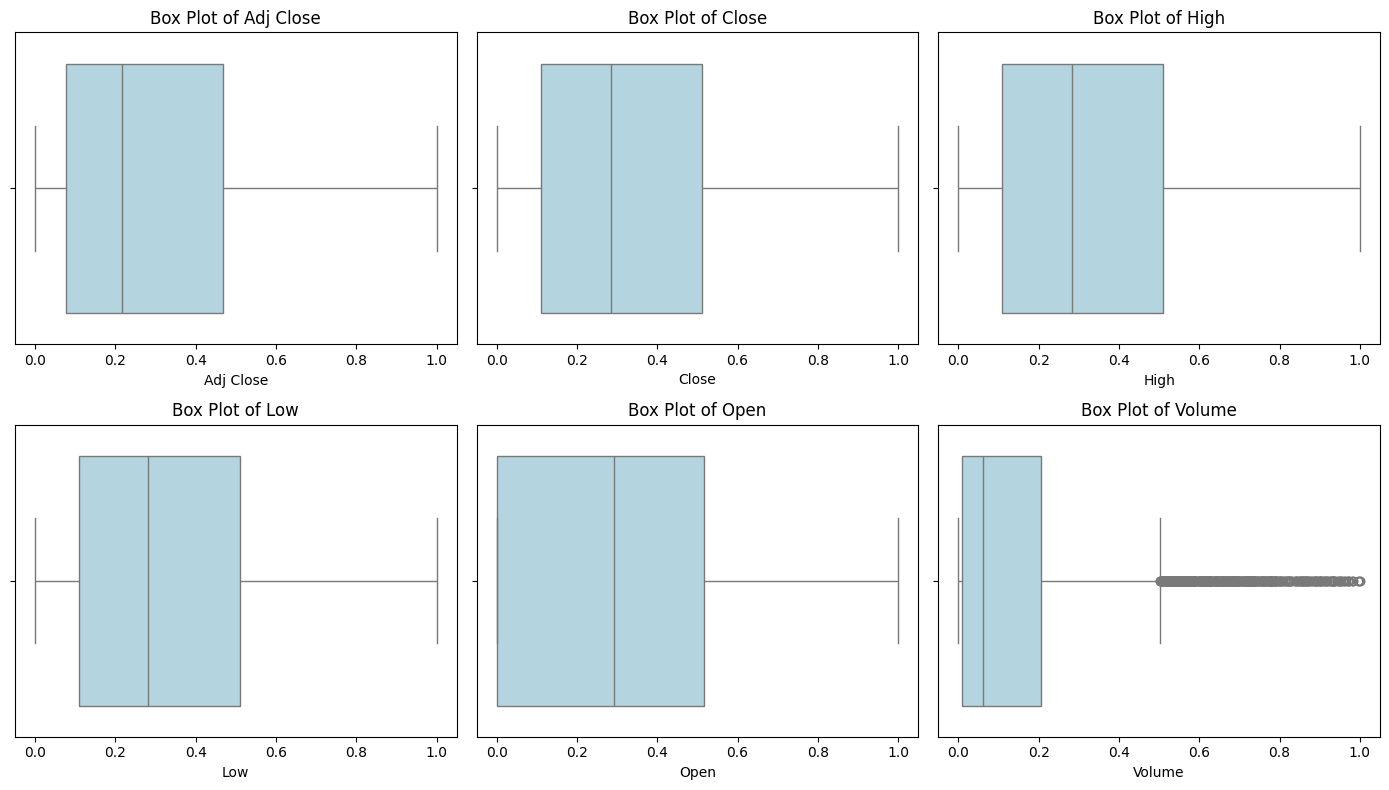

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 8))

# List of numerical columns
numerical_columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# Create a box plot for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.boxplot(data=df, x=col, color='lightblue')
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)

# Adjust layout
plt.tight_layout()
plt.show()


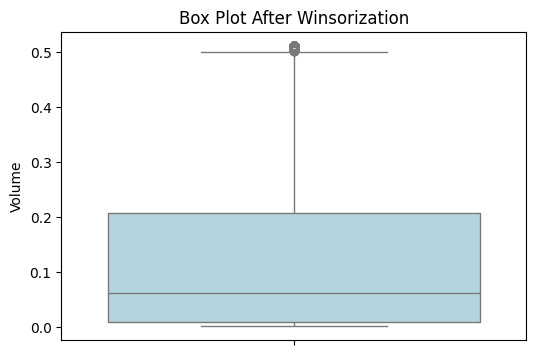

In [ ]:
from scipy.stats.mstats import winsorize

# Apply Winsorization (Capping extreme values at 5% and 95%)
df['Volume'] = winsorize(df['Volume'], limits=[0.05, 0.05])

# Plot the new boxplot after handling outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Volume'], color="lightblue")
plt.title("Box Plot After Winsorization")
plt.show()


In [ ]:
import pandas as pd

# Get descriptive statistics for all numeric columns
stats = df.describe()
print(stats)


          Adj Close         Close          High           Low          Open  \
count  11089.000000  11089.000000  11089.000000  11089.000000  11089.000000   
mean       0.277103      0.313032      0.312026      0.312041      0.302550   
std        0.234366      0.231471      0.230505      0.230646      0.247916   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.076197      0.109681      0.109529      0.109970      0.000000   
50%        0.216589      0.284092      0.283195      0.282017      0.293351   
75%        0.468616      0.511367      0.509546      0.509521      0.516272   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             Volume  Daily_Return           MA7          MA30    Volatility  
count  11089.000000  11088.000000  11083.000000  11060.000000  11083.000000  
mean       0.129264      0.000540     62.510832     62.466810      0.933788  
std        0.150362      0.017894     50.940937     50

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

In [ ]:
numerical_columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

print("Skewness:")
print(df[numerical_columns].skew())

print("\nKurtosis:")
print(df[numerical_columns].kurt())


Skewness:
Adj Close    0.762988
Close        0.491885
High         0.492557
Low          0.493103
Open         0.324749
Volume       1.207152
dtype: float64

Kurtosis:
Adj Close   -0.377859
Close       -0.666821
High        -0.664504
Low         -0.666997
Open        -0.871052
Volume       0.413914
dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Define features (X) and target (y)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Adj Close']

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("📌 Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


📌 Linear Regression Performance:
MAE: 0.025747265061646377
MSE: 0.0009550646777356703
R² Score: 0.9826427504347369


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("\n📌 Random Forest Regressor Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))



📌 Random Forest Regressor Performance:
MAE: 0.008331454044465909
MSE: 0.0003242635012076244
R² Score: 0.9941068676849083


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Selecting independent variables (features) and target variable
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Adj Close']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the dataset (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("SVR Model Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


SVR Model Performance:
Mean Squared Error (MSE): 0.002026955627649317
R^2 Score: 0.963162311928197


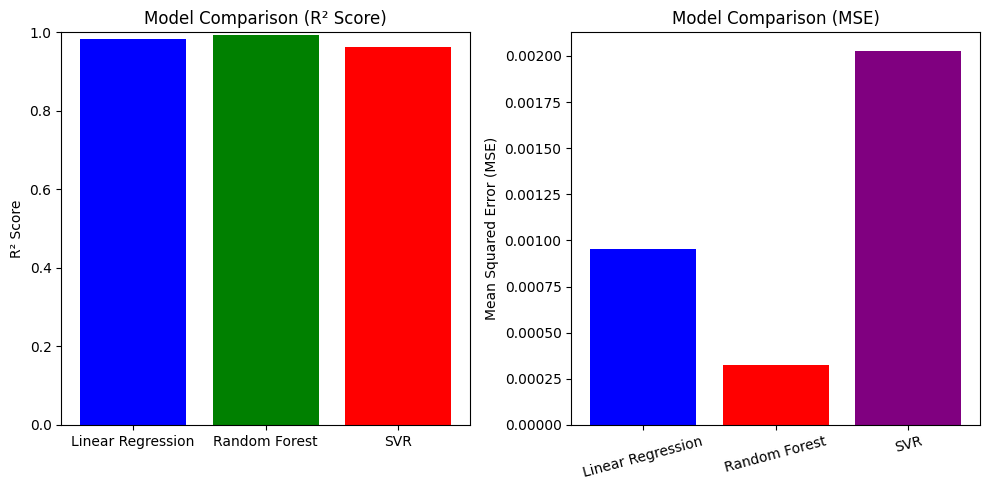

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Store model names and their R² scores & MSE values
models = ['Linear Regression', 'Random Forest','SVR']
r2_scores = [r2_linear,r2_random_forest,r2_svr]
mse_values = [mse_linear, mse_random_forest, mse_svr]

# Plot R² scores
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.bar(models, r2_scores, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.ylabel("R² Score")
plt.title("Model Comparison (R² Score)")
plt.ylim(0, 1)  # R² score range is usually 0 to 1

# Plot MSE values
plt.subplot(1, 2, 2)
plt.bar(models, mse_values, color=['blue','red', 'purple'])
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Model Comparison (MSE)")

# Show the plots
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
